In [1]:
import pandas as pd

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x18,x19,x20,x21,x22,x23,x24,x25,x26,target
0,LMM0QSNNYK,44.0,56094.0,89624.0,641,66,3.0,NaN,12,0.11,...,Crypto,Yes,5,3,43.647232,9,No,639,Yes,0
1,3JSLUSQB99,51.0,NaN,165517.0,782,86,3.0,23.19,48,0.45,...,Crypto,No,7,4,64.134993,2,Yes,781,Yes,0
2,OIMABFRX8V,NaN,100585.0,229235.0,1009,63,4.0,8.65,60,0.52,...,Stocks,No,22,4,55.390556,6,No,1008,Yes,0
3,39LINYU2DH,41.0,38688.0,70195.0,817,99,2.0,5.03,60,0.87,...,Real Estate,Yes,20,7,24.050544,1,No,818,No,0
4,FFP5376KA0,NaN,72319.0,213954.0,844,53,4.0,14.47,12,0.45,...,Bonds,Yes,16,7,89.721414,4,Yes,844,No,0


In [7]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164742 entries, 0 to 164741
Data columns (total 28 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      164742 non-null  object 
 1   x1      140718 non-null  float64
 2   x2      148224 non-null  float64
 3   x3      151626 non-null  float64
 4   x4      164742 non-null  int64  
 5   x5      164742 non-null  int64  
 6   x6      161442 non-null  float64
 7   x7      156484 non-null  float64
 8   x8      164742 non-null  int64  
 9   x9      164742 non-null  float64
 10  x10     164742 non-null  object 
 11  x11     164742 non-null  object 
 12  x12     133318 non-null  object 
 13  x13     164742 non-null  object 
 14  x14     164742 non-null  object 
 15  x15     164742 non-null  object 
 16  x16     161915 non-null  object 
 17  x17     164742 non-null  int64  
 18  x18     164742 non-null  object 
 19  x19     164742 non-null  object 
 20  x20     164742 non-null  int64  
 21  x21     16

In [9]:
print(train.isnull().sum())

id            0
x1        24024
x2        16518
x3        13116
x4            0
x5            0
x6         3300
x7         8258
x8            0
x9            0
x10           0
x11           0
x12       31424
x13           0
x14           0
x15           0
x16        2827
x17           0
x18           0
x19           0
x20           0
x21           0
x22           0
x23           0
x24           0
x25           0
x26           0
target        0
dtype: int64


In [11]:
print(test.isnull().sum())

id         0
x1      9841
x2      6778
x3      5459
x4         0
x5         0
x6      1350
x7      3362
x8         0
x9         0
x10        0
x11        0
x12    12813
x13        0
x14        0
x15        0
x16     1151
x17        0
x18        0
x19        0
x20        0
x21        0
x22        0
x23        0
x24        0
x25        0
x26        0
dtype: int64


In [13]:
print(train.describe())

                  x1             x2             x3             x4  \
count  140718.000000  148224.000000  151626.000000  164742.000000   
mean       45.706384   82409.640173  127768.826461     598.163753   
std        19.119221   38977.113837   70818.917038     186.273297   
min        18.000000   15000.000000    5001.000000     300.000000   
25%        31.000000   48729.000000   66268.750000     444.000000   
50%        44.000000   82443.000000  127906.500000     589.000000   
75%        58.000000  116119.000000  189118.250000     734.000000   
max       119.000000  149999.000000  249997.000000    1099.000000   

                  x5             x6             x7             x8  \
count  164742.000000  161442.000000  156484.000000  164742.000000   
mean       59.565290       2.501772      13.521076      36.010198   
std        34.652879       1.117388       6.645455      16.966439   
min         0.000000       1.000000       2.000000      12.000000   
25%        30.000000       2.0000

In [37]:
# Fill missing values for numerical columns with median
for col in ['x1', 'x2', 'x3', 'x6', 'x7']:
    median_value = train[col].median()
    train[col] = train[col].fillna(median_value)
    test[col] = test[col].fillna(median_value)

In [49]:
# Fill missing values in categorical features with mode
for col in ['x12', 'x16']:
    mode_value = train[col].mode()[0]
    train[col] = train[col].fillna(mode_value).infer_objects(copy=False)
    test[col] = test[col].fillna(mode_value).infer_objects(copy=False)

In [51]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

In [53]:
categorical_features = train.select_dtypes(include=['object']).columns.tolist()
categorical_features.remove('id')

In [57]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [59]:
encoded_train = pd.DataFrame(encoder.fit_transform(train[categorical_features]))
encoded_test = pd.DataFrame(encoder.transform(test[categorical_features]))

In [63]:
# Assigning column names to encoded features
encoded_train.columns = encoder.get_feature_names_out(categorical_features)
encoded_test.columns = encoder.get_feature_names_out(categorical_features)

In [65]:
# Drop original categorical columns and merge encoded features
train = train.drop(columns=categorical_features).join(encoded_train)
test = test.drop(columns=categorical_features).join(encoded_test)

In [67]:
train.head()

,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x18_Bonds,x18_Crypto,x18_Real Estate,x18_Stocks,x19_No,x19_Yes,x24_No,x24_Yes,x26_No,x26_Yes
0,LMM0QSNNYK,44.0,56094.0,89624.0,641,66,3.0,13.52,12,0.11,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,3JSLUSQB99,51.0,82443.0,165517.0,782,86,3.0,23.19,48,0.45,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,OIMABFRX8V,44.0,100585.0,229235.0,1009,63,4.0,8.65,60,0.52,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
3,39LINYU2DH,41.0,38688.0,70195.0,817,99,2.0,5.03,60,0.87,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,FFP5376KA0,44.0,72319.0,213954.0,844,53,4.0,14.47,12,0.45,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [69]:
test.head()

,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x18_Bonds,x18_Crypto,x18_Real Estate,x18_Stocks,x19_No,x19_Yes,x24_No,x24_Yes,x26_No,x26_Yes
0,BQKL7YNT4V,39.0,73750.0,210740.0,539,4,3.0,21.88,60,0.68,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,7T73XW2TOH,64.0,53943.0,188188.0,704,26,1.0,8.74,12,0.43,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,1VJFNX4I8R,60.0,109278.0,72345.0,362,82,2.0,23.24,24,0.11,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,T6133JDV71,44.0,63105.0,18241.0,776,112,2.0,3.01,12,0.86,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,WZ4NG449GH,44.0,82443.0,241039.0,489,24,1.0,6.55,36,0.70,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0


In [71]:
# Feature Scaling
scaler = StandardScaler()
feature_columns = train.columns.tolist()
feature_columns.remove('id')
feature_columns.remove('target')
train[feature_columns] = scaler.fit_transform(train[feature_columns])
test[feature_columns] = scaler.transform(test[feature_columns])

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

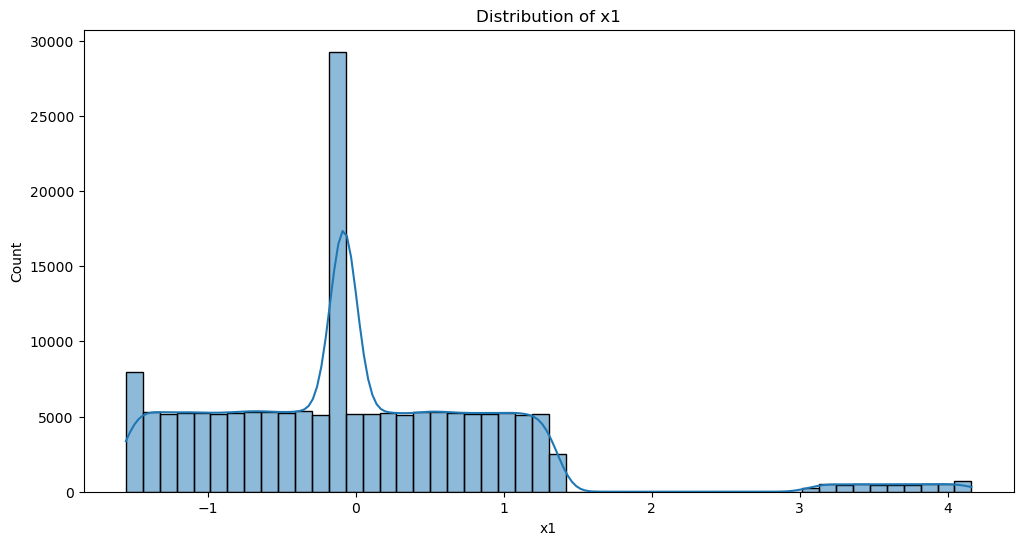

In [75]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(12, 6))
sns.histplot(train['x1'], bins=50, kde=True)
plt.title('Distribution of x1')
plt.show()

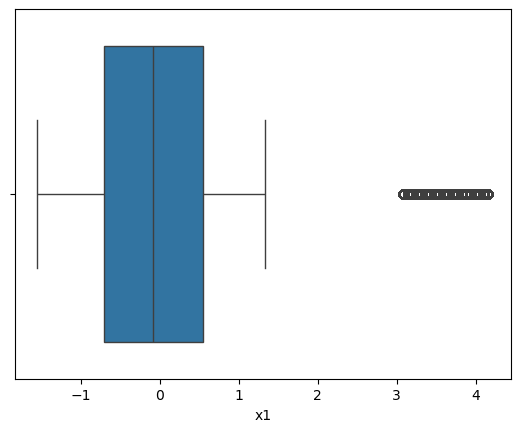

In [95]:
sns.boxplot(x=train['x1'])
plt.show()

In [97]:
print(train['x1'].value_counts().head(10))

x1
-0.082438    26630
-0.591475     2702
-1.496429     2698
-0.308677     2696
 0.539718     2687
-1.552989     2675
-0.704594     2672
 0.483158     2670
 0.200360     2668
 1.048754     2666
Name: count, dtype: int64


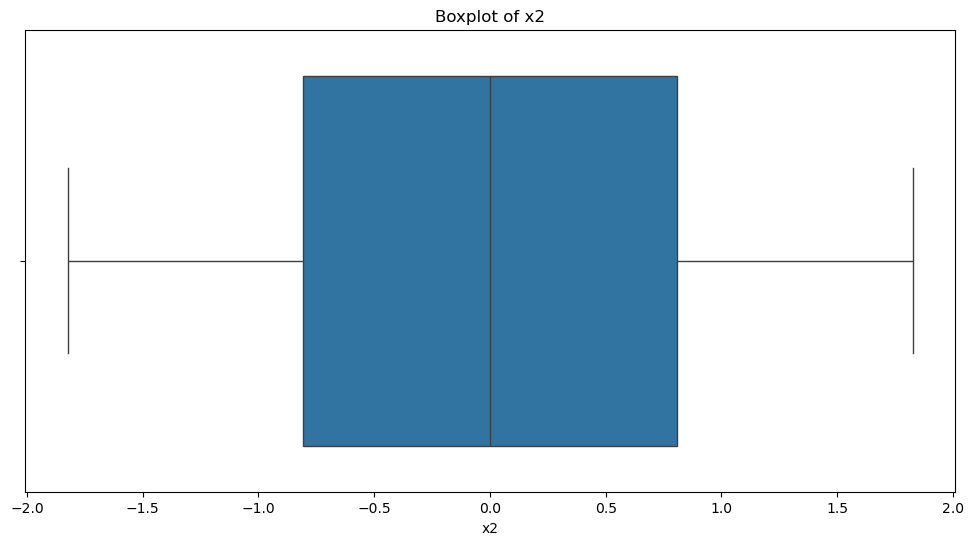

In [77]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=train['x2'])
plt.title('Boxplot of x2')
plt.show()

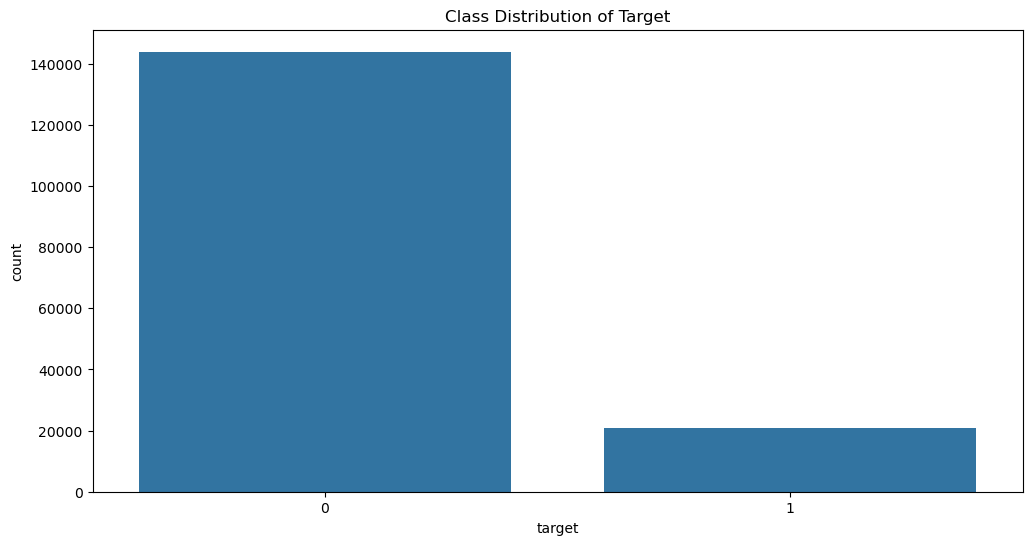

In [79]:
plt.figure(figsize=(12, 6))
sns.countplot(x=train['target'])
plt.title('Class Distribution of Target')
plt.show()

In [89]:
numeric_train = train.select_dtypes(include=['number'])

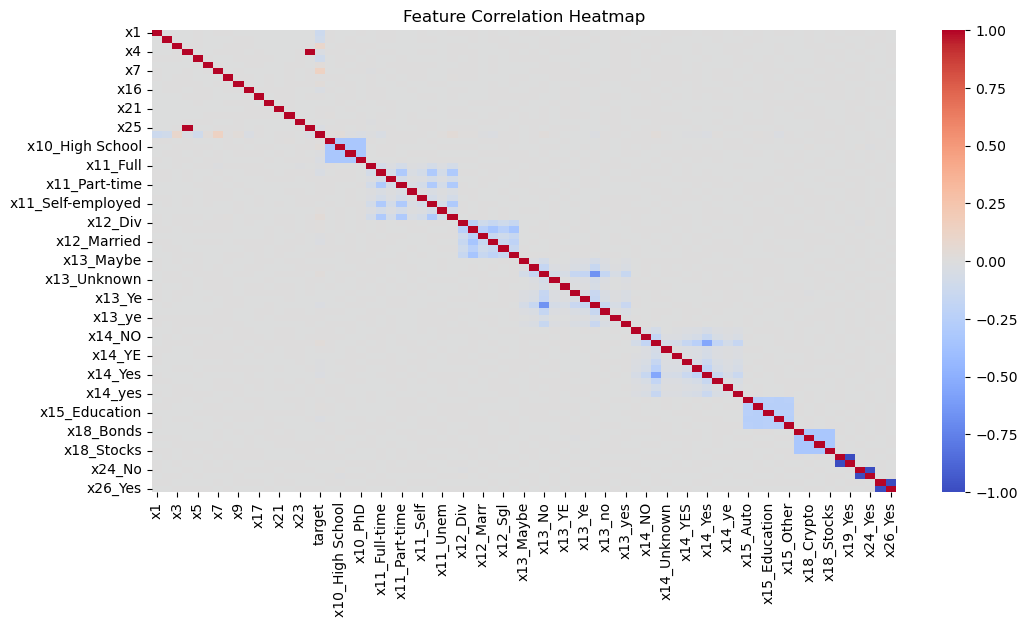

In [91]:
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_train.corr(), cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()

In [107]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

In [109]:
# Handling Imbalanced Data (SMOTE)
X = train[feature_columns]
y = train['target']
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

In [111]:
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [119]:
from xgboost import XGBClassifier

In [121]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier()
}

Logistic Regression - F1 Score: 0.6822046921421986
              precision    recall  f1-score   support

           0       0.68      0.66      0.67     28767
           1       0.67      0.69      0.68     28827

    accuracy                           0.68     57594
   macro avg       0.68      0.68      0.68     57594
weighted avg       0.68      0.68      0.68     57594



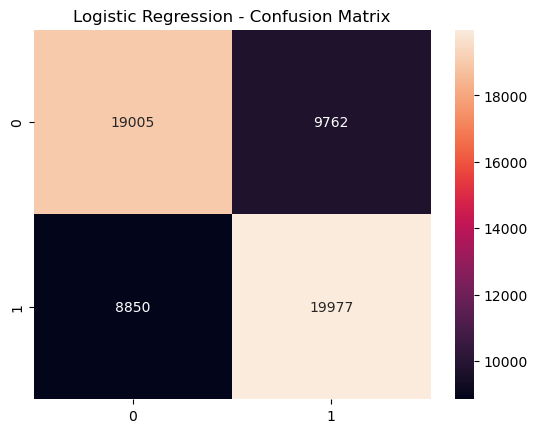

Random Forest - F1 Score: 0.9682799331460474
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     28767
           1       0.99      0.94      0.97     28827

    accuracy                           0.97     57594
   macro avg       0.97      0.97      0.97     57594
weighted avg       0.97      0.97      0.97     57594



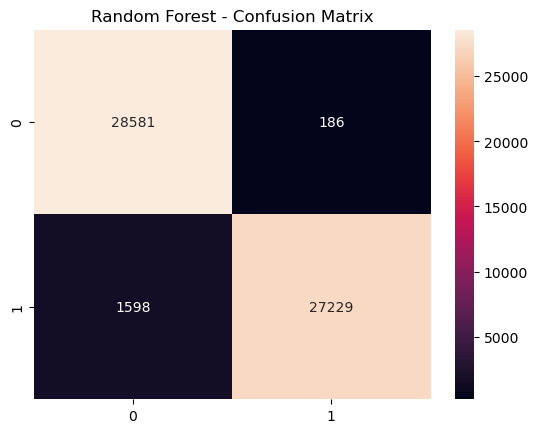

XGBoost - F1 Score: 0.8911207826507458
              precision    recall  f1-score   support

           0       0.85      0.97      0.90     28767
           1       0.96      0.83      0.89     28827

    accuracy                           0.90     57594
   macro avg       0.91      0.90      0.90     57594
weighted avg       0.91      0.90      0.90     57594



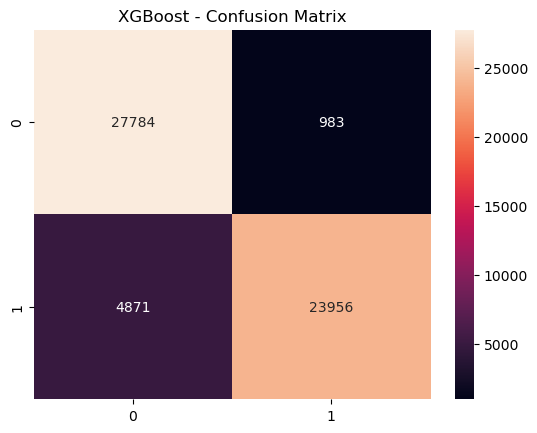

In [123]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    print(f"{name} - F1 Score: {f1_score(y_val, y_pred)}")
    print(classification_report(y_val, y_pred))
    sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt='d')
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

In [135]:
import optuna

In [127]:
# Hyperparameter Tuning with Optuna
def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3)
    }
    model = XGBClassifier(**param)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    return f1_score(y_val, y_pred)

In [137]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)
best_params = study.best_params

[I 2025-02-22 10:17:04,132] A new study created in memory with name: no-name-20e82459-7e8a-40f1-85b9-c46c1c5fdfcd
[I 2025-02-22 10:17:17,356] Trial 0 finished with value: 0.83484175720359 and parameters: {'n_estimators': 196, 'max_depth': 3, 'learning_rate': 0.04569399697538065}. Best is trial 0 with value: 0.83484175720359.
[I 2025-02-22 10:17:58,686] Trial 1 finished with value: 0.962667852378835 and parameters: {'n_estimators': 119, 'max_depth': 11, 'learning_rate': 0.20852793886649346}. Best is trial 1 with value: 0.962667852378835.
[I 2025-02-22 10:18:13,706] Trial 2 finished with value: 0.867711812936532 and parameters: {'n_estimators': 209, 'max_depth': 4, 'learning_rate': 0.21916242858330265}. Best is trial 1 with value: 0.962667852378835.
[I 2025-02-22 10:18:50,692] Trial 3 finished with value: 0.9602106911523952 and parameters: {'n_estimators': 57, 'max_depth': 13, 'learning_rate': 0.18060397049850782}. Best is trial 1 with value: 0.962667852378835.
[I 2025-02-22 10:19:12,883

In [139]:
# Final Model with Best Params
final_model = XGBClassifier(**best_params)
final_model.fit(X_train, y_train)
y_pred_final = final_model.predict(X_val)
print(f"Final Model - F1 Score: {f1_score(y_val, y_pred_final)}")

Final Model - F1 Score: 0.9686109825972454


In [141]:
# Kaggle Submission
test_preds = final_model.predict(test[feature_columns])
submission = pd.DataFrame({'id': test['id'], 'target': test_preds})
submission.to_csv('submission.csv', index=False)

In [143]:
data = pd.read_csv('submission.csv')

In [147]:
data.head(100)

,id,target
0,BQKL7YNT4V,0
1,7T73XW2TOH,0
2,1VJFNX4I8R,0
3,T6133JDV71,0
4,WZ4NG449GH,0
...,...,...
95,G6XWYMS6G4,0
96,177OBCCGAH,1
97,53EY8CXBFJ,0
98,7VEK8WJ8C6,0
